In [204]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Reading the English version file

In [2]:
data = pd.read_csv('EnglishV1.csv')
data = pd.DataFrame(data=data)

n = 7
# Slicing last n rows
data = data[:-n]

#data.tail(2)

# Cleaning

#### Adjusting columns names to be easily extraced by columns of interest\ days \ patient ID

In [3]:
# list of column names

cols = list(data.columns.values.tolist())

In [4]:
# extracting list of column days for each day

J0 = cols[0:21]
J1 = cols[21:42]
J2 = cols[42:63] 
J3 = cols[63:82]
J4 = cols[82:103]
J5 = cols[103:122]
J6 = cols[122:141]
J7 = cols[141:161]
J8 = cols[161:180]
J9 = cols[180:199]
J10 = cols[199:218]
J11 = cols[218:239]
J12 = cols[239:258]
J13 = cols[258:277]
J14 = cols[277:299]

In [5]:
# removing spaces and days strings


j0 = list(map(lambda x: x.replace('J0\n','').replace('J0 ',''),J0))
j1 = list(map(lambda x: x.replace('J1\n','').replace('J1 ',''),J1))
j2 = list(map(lambda x: x.replace('J2\n','').replace('J2 ',''),J2))
j3 = list(map(lambda x: x.replace('J3\n','').replace('J3 ',''),J3))
j4 = list(map(lambda x: x.replace('J4\n','').replace('J4 ',''),J4))
j5 = list(map(lambda x: x.replace('J5\n','').replace('J5 ',''),J5))


j6 = list(map(lambda x: x.replace('J6\n','').replace('J6 ',''),J6))
j7 = list(map(lambda x: x.replace('J7\n','').replace('J7 ',''),J7))
j8 = list(map(lambda x: x.replace('J8\n','').replace('J8 ',''),J8))
j9 = list(map(lambda x: x.replace('J9\n','').replace('J9 ',''),J9))
j10 = list(map(lambda x: x.replace('J10\n','').replace('J10 ',''),J10))
j11 = list(map(lambda x: x.replace('J11\n','').replace('J11 ',''),J11))


j12 = list(map(lambda x: x.replace('J12\n','').replace('J12 ',''),J12))
j13 = list(map(lambda x: x.replace('J13\n','').replace('J13 ',''),J13))
j14 = list(map(lambda x: x.replace('J14\n','').replace('J14 ',''),J14))

In [6]:
new_columns = j0+j1+j2+j3+j4+j5+j6+j7+j8+j9+j10+j11+j12+j13+j14

In [7]:
new_columns = list(map(lambda x: x.replace(' ','').replace('J12 ',''),new_columns))

In [8]:
len(new_columns)

297

In [9]:
d = data.copy()

In [10]:
d.columns = new_columns

In [11]:
#indexing the table by patient numbet

d = d.set_index('Patientnumber')

In [12]:
len(d.columns.unique())

42

In [13]:
#renaming to make columns identical as same features has different strings



d.rename(columns={'Qualityofsleep(0=bad1=excellent)':'Qualityofsleep(0-10)(0=bad;1=excellent)',
                  'Qualityofsleep(0=bad;1=excellent)':'Qualityofsleep(0-10)(0=bad;1=excellent)',
                  'Qualityofsleep(0=bad,1=excellent)': 'Qualityofsleep(0-10)(0=bad;1=excellent)'
                 }, inplace=True)

In [14]:
len(d.columns.unique())

39

In [15]:

#renaming to make columns identical as same features has different strings

d.rename(columns={'TimeReserveN°1received':'TimeReserveNo.1received', 
                  'TimeReserveNo.2Receive':'TimeReserveNo.2received',
                 'TimeReserven°3received':'TimeReserveNo.3received',
                 'TimeReserveN°2received':'TimeReserveNo.2received',
                 'TimeReserveN°3received':'TimeReserveNo.3received'}, inplace=True)

In [16]:
len(d.columns.unique())

34

In [17]:
#renaming to make columns identical as same features has different strings

d.rename(columns={'Cohen-manfieldagitationinventory':'CohenMfieldAgitationInventory'
                 }, inplace=True)

In [18]:
len(d.columns.unique())

33

In [19]:
unique_columns = d.columns.unique()

In [20]:
print('Number of unique columns : ', len(unique_columns))

Number of unique columns :  33


In [21]:
# printing last 2 patients after cleaning

d.tail(2)

,Dateofinclusion,Age,Diagnosisdementia(0=no;1=yes),MMSE(figure)/30,Patientcommunicating(0=no;1=yes),Comorbidities(numberaccordingtoCharlson),Pain(0=No;1=yes),Originalpain(1=osteoarticular;2=inflammatory;3=neurogenic;4=visceral;5=Other),"Explanation""OtherOrigin""(if5incolumnI)",OfficeAntalgie(0=No;1=Yes),...,TimeReserveNo.1received,TimeReserveNo.2received,TimeReserveNo.3received,AlgoplusSuppn°1(.=N/A),ALGOPLUSEXPERTTIME1(.=N/A),EvaPainSupply2(.=N/A),TimePainEvaSupplN°2(.=N/A),AlgoplusSuppN°2(.=N/A),TimeAlgopelusSuppln°2(.=N/A),CohenMfieldAgitationInventory
Patientnumber,,,,,,,,,,,,,,,,,,,,,
17,17/6/2021,84.0,0.0,NaN,1.0,13.0,1.0,"3,5",plaies Ulcères MI,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,8/6/2021,64.0,0.0,24.0,1.0,17.0,1.0,"1,3,4",.,1.0,...,8h20,11h30,.,.,.,4,10h,.,.,32


In [22]:
table = d.copy()



# Helper functions

In [23]:
# to extract patient row by ID

def extract_patient(ID):
     p = pd.DataFrame(d.loc[[ID]])
    
     return p
    

In [24]:
# to create 15-day series as rows for every patient for the features of interest (BVP,SLEEP,PRESSURE ....)




def create_data(filters, ID):
    
    new_df = pd.DataFrame()
    patient = extract_patient(ID)
    patient = patient.fillna('not applicable', inplace=False) #Filling empty cells by not applicable
    patient = patient.replace(['.'],'not applicable')  # replacing dot (.) cells by not applicable
    #patient = patient.replace(['not applicable'],np.nan)
    
    for i in filters:

        to_add = patient.filter(like=i).stack().values.tolist()

        
        new_df[i] = to_add
        
        new_df[i] = new_df[i].replace(['not applicable'],np.nan)  # replacing 'not applicable' by numpy NaN for numerical calculations
        
    
        
    new_df.index.name = 'Days' 
    new_df['Systolic blood pressure'] = new_df['Bloodpressure(mmhg/mmhg)'].str.extract('(\d+)')  #extract Systolic blood pressure
    new_df['Diastolic blood pressure'] = new_df['Bloodpressure(mmhg/mmhg)'].str[-2:]    # extract Diastolic blood pressure
    
    
    
    return new_df

In [25]:
#to get classes as groups (example :communicative and having dementia )


def classification(df,f1,f2,n1,n2):
    table = df.loc[(df[f1] == n1) & (df[f2] == n2)]
    return table 

In [26]:
# to get time-series tables for visualization


def tables(df):
    amazing_list = []
    for index, row in df.iterrows():
        amazing_list.append(create_data(columns_of_interest, index))
        
    return amazing_list  

In [70]:



columns_of_interest = [
                       'Qualityofsleep(0-10)(0=bad;1=excellent)',
                       'Pulse(figure)',
                       'EVAPain(.=N/A)', 
                        'Bloodpressure(mmhg/mmhg)',
                        'Temperature(numberC)',
                        'Frequencyresp(x/min)'
]

In [71]:
#columns_of_interest = unique_columns

In [72]:
dementia = 'Diagnosisdementia(0=no;1=yes)'
communication = 'Patientcommunicating(0=no;1=yes)'
pain = 'Pain(0=No;1=yes)'

In [73]:

# to prepare the axes for drawing visualizations



def pre_draw(pap):
    


    cols = pap.columns

    pap[cols] = pap[cols].apply(pd.to_numeric, errors='coerce')   # convert the strings cells to numerical and convert non numerical values to NaNs



    y = pap.index
    x1 = pap['EVAPain(.=N/A)']
    x2 = pap['Qualityofsleep(0-10)(0=bad;1=excellent)']
    x3 = pap['Pulse(figure)']
    x4 = pap['Frequencyresp(x/min)']
    x5 = pap['Temperature(numberC)']
    x6 = pap['Systolic blood pressure']
    x7 = pap['Diastolic blood pressure']
    x8 = pap['Antalgieinreserve(0=no;1=yes)']
     
        
    l = [y,x1,x2,x3,x4,x5,x6,x7,x8]    
    
    
    return l 

In [74]:
# visualizing 



def draw(pa):
        
    p = pre_draw(pa)    
        
    y,x1,x2,x3,x4,x5,x6,x7,x8 = p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8]
        
        
    
    sns.set_style('white')

    fig, ax1 = plt.subplots(figsize=(14,3))

    color1 = 'green'
    ax1.plot(y, x3, color=color1, lw=1)
    ax1.set_ylabel(' BVP', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    ax2 = ax1.twinx()
    color8= 'crimson'
    ax2.plot(y, x1, color=color8, lw=2)
    ax2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    ax2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    ax2.spines['right'].set_color(color8)


    # __________________________________________________

    fig, bx1 = plt.subplots(figsize=(14,3))

    color6 = 'blue'
    bx1.plot(y, x6, color=color6, lw=1)
    bx1.set_ylabel('Systolic blood pressure', fontweight='bold', fontsize=12)
    #bx1.tick_params(axis='y', labelcolor=color6, labelsize=12)




    color7 = 'orange'
    bx1.plot(y, x7, color=color7, lw=1)
    bx1.set_ylabel(' Blood pressure', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    bx2 = bx1.twinx()
    color8= 'crimson'
    bx2.plot(y, x1, color=color8, lw=2)
    bx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    bx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    bx2.spines['right'].set_color(color8)

    #.  ________________________________________


    fig, cx1 = plt.subplots(figsize=(14,3))

    color7 = 'green'
    cx1.plot(y, x5, color=color7, lw=1)
    cx1.set_ylabel(' Temperature(C)', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    cx2 = cx1.twinx()
    color8= 'crimson'
    cx2.plot(y, x1, color=color8, lw=2)
    cx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    cx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    cx2.spines['right'].set_color(color8)

    # __________________________________

    #

    fig, dx1 = plt.subplots(figsize=(14,3))

    color7 = 'green'
    dx1.plot(y, x4, color=color7, lw=1)
    dx1.set_ylabel(' Respiratory rate (x/min)', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    dx2 = dx1.twinx()
    color8= 'crimson'
    dx2.plot(y, x1, color=color8, lw=2)
    dx2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    dx2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    dx2.spines['right'].set_color(color8)


    #______________________________

    fig, ex1 = plt.subplots(figsize=(14,3))

    color70 = 'dodgerblue'
    ex1.plot(y, x2, color=color70, lw=1)
    ex1.set_ylabel(' Quality of Sleep', fontweight='bold', fontsize=15)
    #bx1.tick_params(axis='y', labelcolor=color7, labelsize=12)


    ex2 = ex1.twinx()
    color8= 'crimson'
    ex2.plot(y, x1, color=color8, lw=2)
    ex2.set_ylabel('Pain', color=color8, fontweight='bold', fontsize=18)
    ex2.tick_params(axis='y', labelcolor=color8, labelsize=12)
    ex2.spines['right'].set_color(color8)


    zx = plt.gca()
    zx.set_frame_on(False)


    plt.tight_layout()
    #plt.savefig('13twinx_figure_3axes.png', dpi=200)

In [192]:

# draw correlation coefficient matrix




def draw_corr(patient):
    
    plt.figure(figsize=(16, 6))
    corr = patient.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cut_off = 0.2  # only show cells with abs(correlation) at least this value
    extreme_1 = 0.60  # show with a star
    extreme_2 = 0.70  # show with a second star
    extreme_3 = 0.80  # show with a third star
    mask |= np.abs(corr) < cut_off
    corr = corr[~mask]  # fill in NaN in the non-desired cells

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
        wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        corr = corr.iloc[wanted_cols, wanted_rows]

    annot = [[f"{val:.4f}"
              + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
              + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
              + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
              for val in row] for row in corr.to_numpy()]
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
    plt.show()


# Extracting patients (10 :18)

In [143]:
new_df = d.loc[[10,11,12,13,14,15,16,17,18]]

In [144]:
slicer = tables(new_df)

# Concatenating all patients records into one dataframe

## 135 rows * 7 columns

In [164]:
all_stacked = pd.concat(slicer, ignore_index=True) # concatenating
del all_stacked['Bloodpressure(mmhg/mmhg)'] #deleting as it now represented by systolic and diastolic blood pressure

In [165]:
all_stacked = all_stacked.apply(pd.to_numeric, errors='coerce') #to convert  cells from strings to numeric

In [166]:
all_stacked

,Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
0,5.0,61.0,7.0,37.2,24.0,122.0,61.0
1,1.0,66.0,0.0,37.1,20.0,150.0,70.0
2,0.0,60.0,0.0,NaN,NaN,144.0,62.0
3,0.0,61.0,3.0,36.6,NaN,103.0,57.0
4,0.0,68.0,2.0,36.8,19.0,122.0,66.0
...,...,...,...,...,...,...,...
130,1.0,93.0,2.0,37.1,14.0,118.0,57.0
131,1.0,97.0,3.0,36.6,17.0,109.0,63.0
132,1.0,92.0,6.0,36.7,NaN,136.0,72.0
133,1.0,100.0,3.0,36.9,NaN,103.0,56.0


In [ ]:
# for all distribution
# Pulse is cut-off

In [271]:
# counting values for every pain score

all_stacked['EVAPain(.=N/A)'].value_counts()

0.0     40
3.0     21
2.0     16
5.0     15
4.0     10
6.0     10
7.0      9
10.0     3
8.0      3
1.0      2
9.0      1
Name: EVAPain(.=N/A), dtype: int64

In [272]:
# converting pain scores into 3 degrees 
# no pain where EVA == 0
# mild - moderate pain where 1 =< EVA <= 5
# severe-worst pain where EVA > 5 


conditions = [
    (all_stacked['EVAPain(.=N/A)'] == 0) ,
    (all_stacked['EVAPain(.=N/A)'] > 5)]


choices = ['no pain', 'severe-worst pain']
    
    
all_stacked['Pain degree'] = np.select(conditions, choices, default='mild-moderate pain')
print(all_stacked['Pain degree'].value_counts())

mild-moderate pain    69
no pain               40
severe-worst pain     26
Name: Pain degree, dtype: int64


In [273]:
# Extracting the records for each of the 3 pain degrees

no_pain = all_stacked.loc[all_stacked['Pain degree'] == 'no pain']
print(len(no_pain) == 40)
moderate_pain = all_stacked.loc[all_stacked['Pain degree'] == 'mild-moderate pain']
print(len(moderate_pain) == 69)
severe_pain = all_stacked.loc[all_stacked['Pain degree'] == 'severe-worst pain']
print(len(severe_pain) == 26)

True
True
True


# Correlation analysis 

## This measures the strength and direction of a linear relationship between two variables. Values always range between -1 (strong negative relationship) and +1 (strong positive relationship)

## why?

### It proves to be a good starting point when starting investigating relationships for the first time.

### Uses for further studies:  can identify the direction and strength of the relationship between variables and narrow the findings down in later studies.

# Please note that a threshold of 0.2 is cut-off, meaning that correlations in range [-0.2 : 0.2 ] are hidden

# For all patients (all pain degrees)

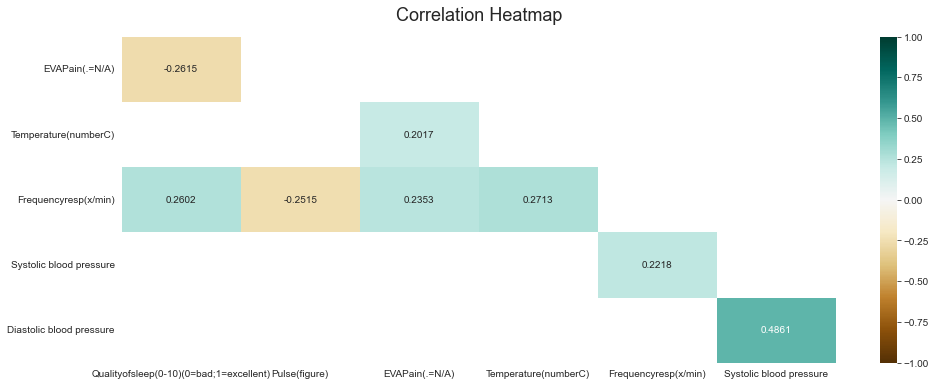

In [198]:
draw_corr(all_stacked)

# No Pain (EVA = 0)

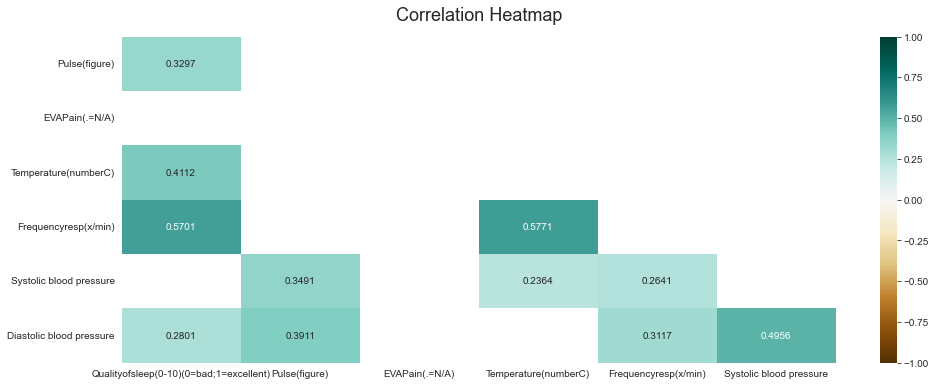

In [199]:
draw_corr(no_pain)

# mild - moderate pain (EVA between 1 to 5)

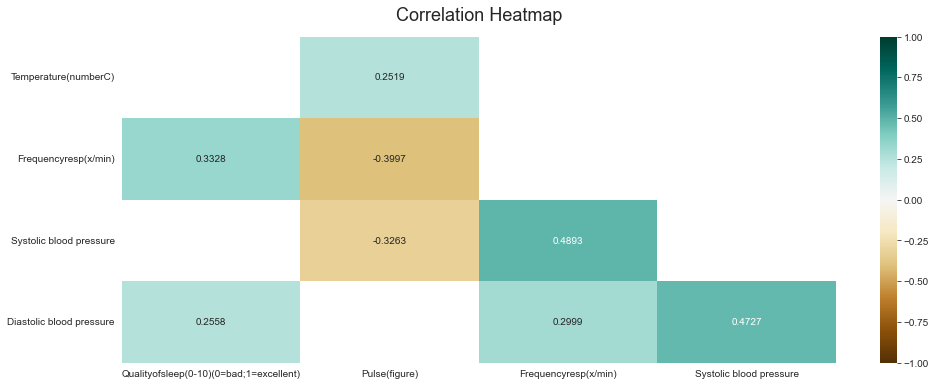

In [196]:
draw_corr(moderate_pain)

# Extreme pain ( EVA between 6 to 10)

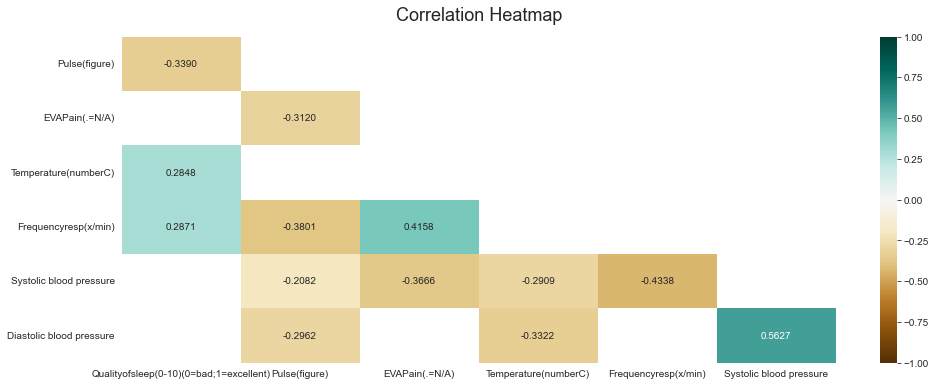

In [197]:
draw_corr(severe_pain)

In [275]:
# Mean and standard deviation for all data and pain degrees seperately


all_mean, all_std = all_stacked.mean(), all_stacked.std()

no_pain_mean, no_pain_std = no_pain.mean(),no_pain.std()

moderate_pain_mean, moderate_pain_std = moderate_pain.mean(), moderate_pain.std()

severe_pain_mean, severe_pain_std = severe_pain.mean(), severe_pain.std()

# Mean

In [226]:
table_means = pd.DataFrame(columns = all_mean.index)

table_means = table_means.append([no_pain_mean])
table_means = table_means.append([moderate_pain_mean])
table_means = table_means.append([severe_pain_mean])
table_means = table_means.append([all_mean])
table_means.index = ['No pain','Slight to moderate pain ', 'Severe to worst pain','All distribution']
table_means
#a = a.append(no_pain_mean)

,Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
No pain,0.948718,78.735294,0.000000,36.696552,18.000000,136.705882,69.441176
Slight to moderate pain,0.609375,78.018519,3.312500,36.764583,19.294118,132.555556,64.888889
Severe to worst pain,0.538462,77.045455,7.153846,36.914286,19.900000,133.181818,65.681818
All distribution,0.697674,78.045455,3.061538,36.776531,19.025000,133.963636,66.454545


# Standard deviation

In [228]:
table_std = pd.DataFrame(columns = all_mean.index)

table_std = table_std.append([no_pain_std])
table_std = table_std.append([moderate_pain_std])
table_std = table_std.append([severe_pain_std])
table_std = table_std.append([all_std])
table_std.index = ['No pain','Slight to moderate pain ', 'Severe to worst pain','All distribution']
table_std

,Qualityofsleep(0-10)(0=bad;1=excellent),Pulse(figure),EVAPain(.=N/A),Temperature(numberC),Frequencyresp(x/min),Systolic blood pressure,Diastolic blood pressure
No pain,0.223456,11.730067,0.000000,0.355048,3.162278,17.486843,7.127374
Slight to moderate pain,0.491747,12.118115,1.180194,0.362902,3.386826,18.309361,12.425881
Severe to worst pain,1.028816,9.925807,1.317340,0.208052,3.784471,17.951353,7.624437
All distribution,0.607308,11.506190,2.707308,0.339436,3.415556,17.919764,10.284607


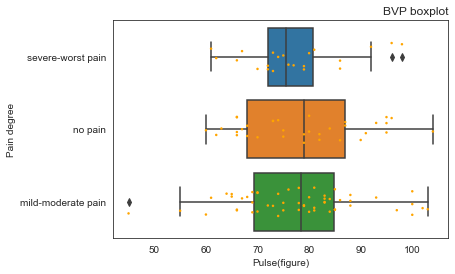

In [278]:
# boxplot
ax = sns.boxplot(x='Pulse(figure)', y='Pain degree', data=all_stacked)
# add stripplot
ax = sns.stripplot(x='Pulse(figure)', y='Pain degree', data=all_stacked, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("BVP boxplot", loc="right")

# show the graph
plt.show()

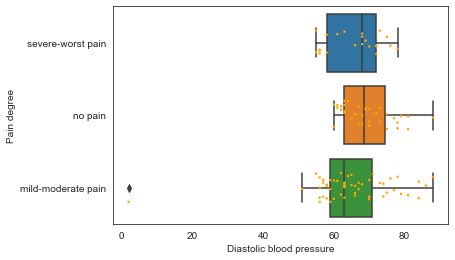

In [237]:
ax = sns.boxplot(x='Diastolic blood pressure', y='Pain degree', data=all_stacked)
# add stripplot
ax = sns.stripplot(x='Diastolic blood pressure', y='Pain degree', data=all_stacked, color="orange", jitter=0.2, size=2.5)

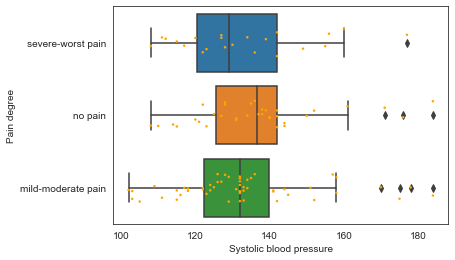

In [276]:
ax = sns.boxplot(x='Systolic blood pressure', y='Pain degree', data=all_stacked)
# add stripplot
ax = sns.stripplot(x='Systolic blood pressure', y='Pain degree', data=all_stacked, color="orange", jitter=0.2, size=2.5)

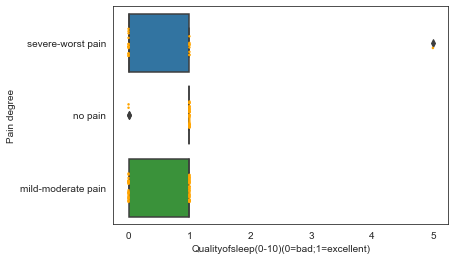

In [279]:
ax = sns.boxplot(x='Qualityofsleep(0-10)(0=bad;1=excellent)', y='Pain degree', data=all_stacked)
# add stripplot
ax = sns.stripplot(x='Qualityofsleep(0-10)(0=bad;1=excellent)', y='Pain degree', data=all_stacked, color="orange", jitter=0.2, size=2.5)

<AxesSubplot:xlabel='Frequencyresp(x/min)', ylabel='Systolic blood pressure'>

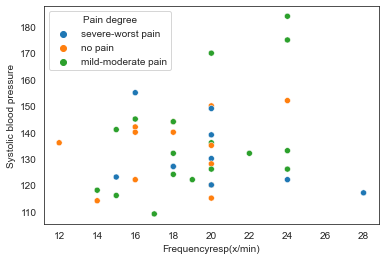

In [292]:
sns.scatterplot(
    data=all_stacked, x="Frequencyresp(x/min)", y="Systolic blood pressure", hue="Pain degree",
    sizes=(20, 200), legend="full"
)

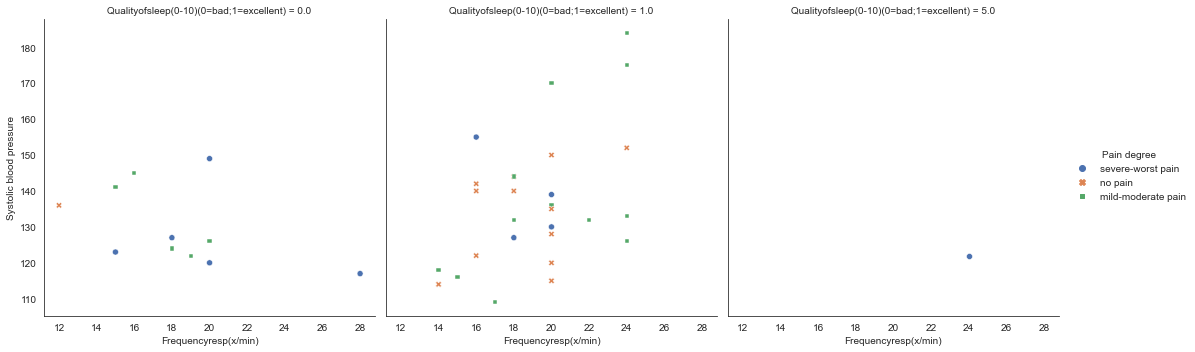

In [298]:
sns.relplot(
    data=all_stacked, x="Frequencyresp(x/min)", y="Systolic blood pressure",
    col="Qualityofsleep(0-10)(0=bad;1=excellent)", hue="Pain degree", style="Pain degree",
    kind="scatter",palette="deep"
)

# Significance Testing


## comparing distribution of the two samples using two-sample Kolmogorov-Smirnov test

##### Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low.

In [245]:
from scipy.stats import ks_2samp

In [255]:
ks_2samp(all_stacked['Pulse(figure)'], no_pain['Pulse(figure)'])


KstestResult(statistic=0.06944444444444445, pvalue=0.9953058441795937)

In [283]:
ks_2samp(no_pain['Pulse(figure)'], severe_pain['Pulse(figure)'])

KstestResult(statistic=0.15384615384615385, pvalue=0.7854023556154326)

## Hypothesis :

### H0 : sleep distributions during pain eposides is the same as no pain
### H1 : not the same

In [286]:
ks_2samp(all_stacked['Qualityofsleep(0-10)(0=bad;1=excellent)'],
         no_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'])

KstestResult(statistic=0.26851851851851855, pvalue=0.018598059462968664)

### ....

In [260]:
ks_2samp(all_stacked['Qualityofsleep(0-10)(0=bad;1=excellent)'],
         severe_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'])

KstestResult(statistic=0.2968660968660969, pvalue=0.0333124491864244)

In [287]:
ks_2samp(all_stacked['Qualityofsleep(0-10)(0=bad;1=excellent)'],
         moderate_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'])

KstestResult(statistic=0.043800322061191624, pvalue=0.9999390881689519)

In [284]:
ks_2samp(severe_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'],
         no_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'])

KstestResult(statistic=0.5653846153846154, pvalue=3.377929949155423e-05)

In [288]:
ks_2samp(no_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'],
         moderate_pain['Qualityofsleep(0-10)(0=bad;1=excellent)'])

KstestResult(statistic=0.31231884057971016, pvalue=0.01060130130158965)